<a href="https://colab.research.google.com/github/yulya11/introduction_to_ai/blob/main/03_lab_ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3

ФИО:   Якубовская Юлия Александровна
Группа: БИВТ-22-СП-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`)
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Датасет exams

In [2]:
data = pd.read_csv('/content/drive/MyDrive/exams.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


Цель: Предсказать успеваемость школьников по математике, чтению и письму на основе их демографических и образовательных характеристик.

Переменные:

• Дискретные:
  * gender (пол) - Категориальная переменная с двумя значениями: мужской и женский (male, female).
  * race/ethnicity (раса/этническая принадлежность) - Категориальная переменная, разделенная на группы A-E.
  * parental level of education (уровень образования родителей) - Категориальная переменная, разделенная на категории: "неполное среднее", "среднее", "неполное высшее", "бакалавриат", "магистратура" ('high school', 'some high school', 'some college', "associate's degree", "bachelor's degree", "master's degree").
  * lunch (тип обеда) - Категориальная переменная с двумя значениями: стандартный и бесплатный (standard, free/reduced).
  * test preparation course (подготовительный курс к тесту) - Категориальная переменная с двумя значениями: завершен,  не завершен (completed, none).
  
• Непрерывные:
  * math score (баллы по математике) - Числовое значение, отражающее оценку ученика по математике.
  * reading score (баллы по чтению) - Числовое значение, отражающее оценку ученика по чтению.
  * writing score (баллы по письму) - Числовое значение, отражающее оценку ученика по письму.

Целевое событие:

• math score, reading score, writing score - дискретные переменные. Мы пытаемся предсказать целое числовое значение оценок по каждому предмету в диапазоне от 0 до 100.

Возможно, более разумным будет пытаться предсказать средний балл по всем трём дисциплинам.


## 2. Понимаем, какая перед нами задача

Так как возможные значения целевых переменных представляют собой диапазон целых чисел от 0 до 100, целесообразным будет представить эту задачу как задачу регрессии.

## 3. Делаем предобработку данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
data['gender'].value_counts()

,count
gender,
male,517
female,483


In [6]:
data['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,323
group D,262
group B,205
group E,131
group A,79


In [7]:
data['test preparation course'].value_counts()

,count
test preparation course,
none,665
completed,335


# Распределение целевых переменных

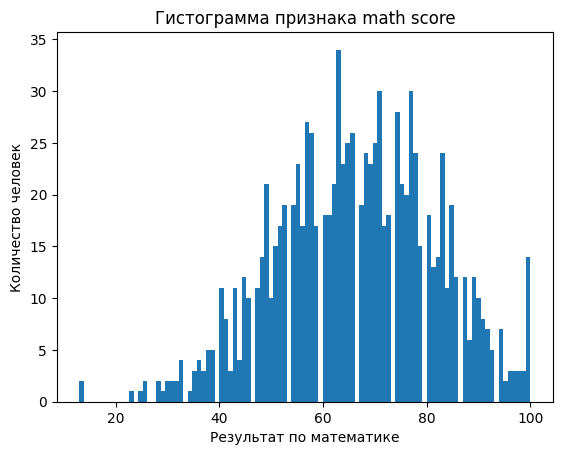

In [8]:
plt.hist(data['math score'], bins=100)

plt.xlabel("Результат по математике")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака math score")

plt.show()

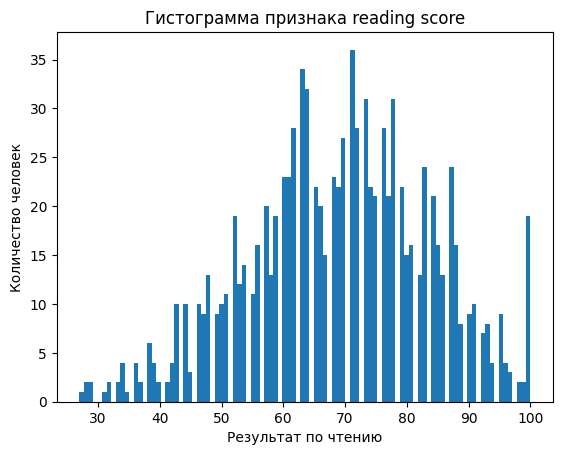

In [9]:
plt.hist(data['reading score'], bins=100)

plt.xlabel("Результат по чтению")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака reading score")

plt.show()

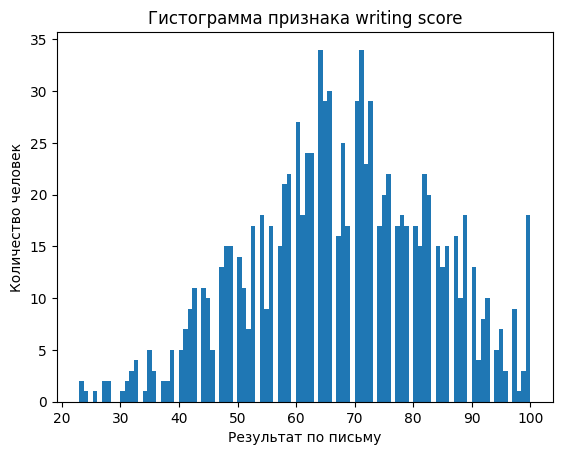

In [10]:
plt.hist(data['writing score'], bins=100)

plt.xlabel("Результат по письму")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака writing score")

plt.show()

# Среднее значение

In [11]:
data['mean score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1).round()
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,male,group A,high school,standard,completed,67,67,63,66.0
1,female,group D,some high school,free/reduced,none,40,59,55,51.0
2,male,group E,some college,free/reduced,none,59,60,50,56.0
3,male,group B,high school,standard,none,77,78,68,74.0
4,male,group E,associate's degree,standard,completed,78,73,68,73.0
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.0
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.0
997,female,group C,some high school,free/reduced,none,32,35,41,36.0
998,female,group C,some college,standard,none,73,74,82,76.0


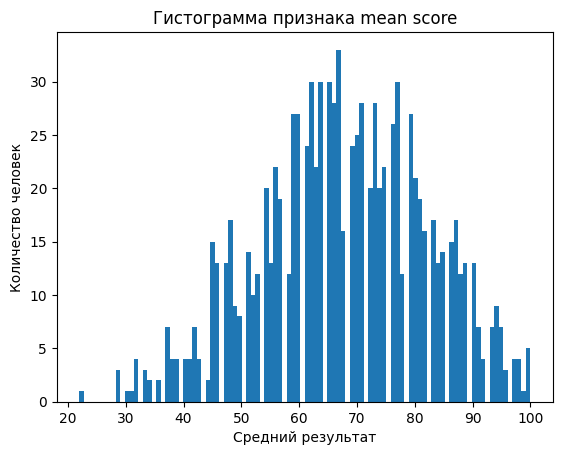

In [12]:
plt.hist(data['mean score'], bins=100)

plt.xlabel("Средний результат")
plt.ylabel("Количество человек")

plt.title("Гистограмма признака mean score")

plt.show()

# Зависимости

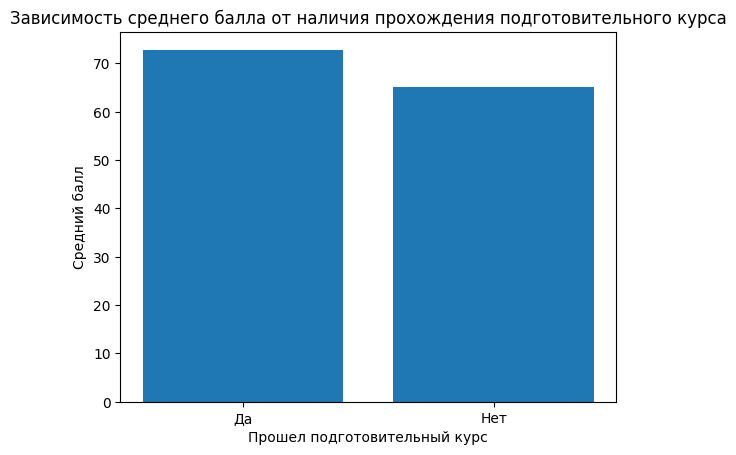

In [15]:
average_scores = data.groupby('test preparation course')['mean score'].mean()

plt.bar(average_scores.index, average_scores.values)

plt.xlabel('Прошел подготовительный курс')
plt.ylabel('Средний балл')

plt.xticks(['none', 'completed'], ['Нет', 'Да'])
plt.title('Зависимость среднего балла от наличия прохождения подготовительного курса')

plt.show()

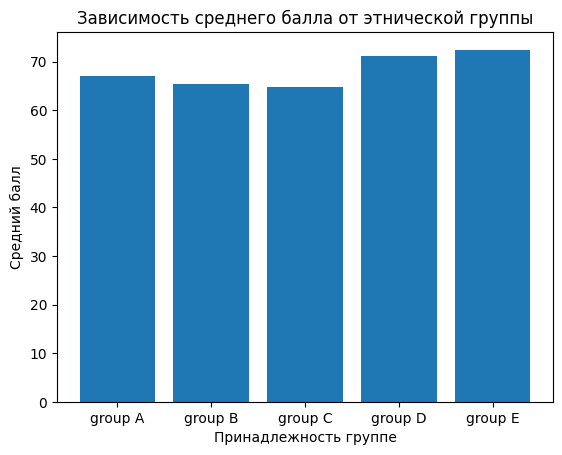

In [16]:
average_scores = data.groupby('race/ethnicity')['mean score'].mean()

plt.bar(average_scores.index, average_scores.values)

plt.xlabel('Принадлежность группе')
plt.ylabel('Средний балл')


plt.title('Зависимость среднего балла от этнической группы')

plt.show()

# Нормирование числовых признаков

In [24]:
cols_to_normalize = ['math score', 'reading score', 'writing score', 'mean score']

# Применяем минимакс-нормализацию к выбранным столбцам
for col in cols_to_normalize:
  data[col] = (data[col] - 0) / (100 - 0)

data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,1,0,2,1,0,0.67,0.67,0.63,0.66
1,0,3,5,0,1,0.40,0.59,0.55,0.51
2,1,4,4,0,1,0.59,0.60,0.50,0.56
3,1,1,2,1,1,0.77,0.78,0.68,0.74
4,1,4,0,1,0,0.78,0.73,0.68,0.73
...,...,...,...,...,...,...,...,...,...
995,1,2,2,1,1,0.73,0.70,0.65,0.69
996,1,3,0,0,0,0.85,0.91,0.92,0.89
997,0,2,5,0,1,0.32,0.35,0.41,0.36
998,0,2,4,1,1,0.73,0.74,0.82,0.76


# Пропуски

In [28]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
mean score,0


Пропуски отсутствуют.

# Закодируем категориальные признаки

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['gender'] = labelencoder.fit_transform(data['gender'])
data['race/ethnicity'] = labelencoder.fit_transform(data['race/ethnicity'])
data['parental level of education'] = labelencoder.fit_transform(data['parental level of education'])
data['lunch'] = labelencoder.fit_transform(data['lunch'])
data['test preparation course'] = labelencoder.fit_transform(data['test preparation course'])
data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,1,0,2,1,0,0.67,0.67,0.63,0.66
1,0,3,5,0,1,0.40,0.59,0.55,0.51
2,1,4,4,0,1,0.59,0.60,0.50,0.56
3,1,1,2,1,1,0.77,0.78,0.68,0.74
4,1,4,0,1,0,0.78,0.73,0.68,0.73
5,0,3,2,1,1,0.63,0.77,0.76,0.72
6,0,0,1,1,1,0.62,0.59,0.63,0.61
7,1,4,4,1,0,0.93,0.88,0.84,0.88
8,1,3,2,1,1,0.63,0.56,0.65,0.61
9,1,2,4,0,1,0.47,0.42,0.45,0.45


<Axes: >

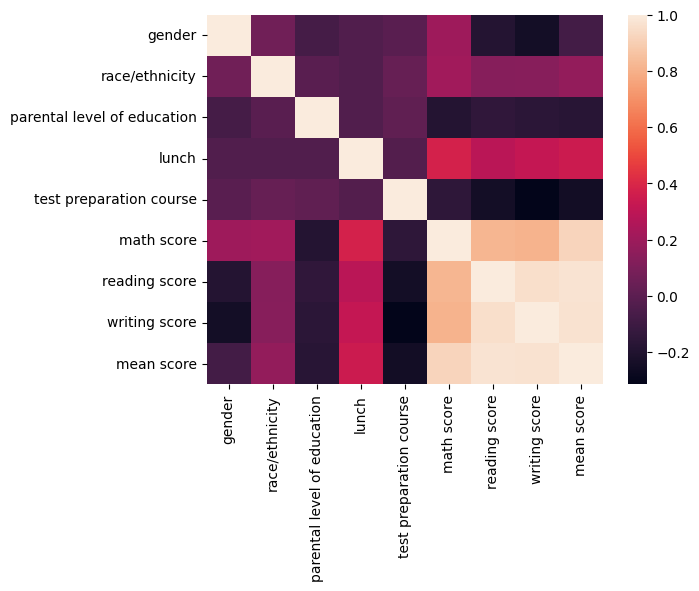

In [23]:
# Матрица корреляций
sns.heatmap(data.corr())

Ожидаемо, что результаты экзаменов по разным дисциплинам будут схожи у одних и тех же студентов, тк если студент готовился к экзаменам, скорее всего, хорошо написал все три, или наоборот. Поэтому уберём результаты по отдельным дисциплинам и будем предсказывать среднее значение по всем трём.

In [27]:
data = data.drop(['math score', 'writing score', 'reading score'],axis=1)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,1,0,2,1,0,0.66
1,0,3,5,0,1,0.51
2,1,4,4,0,1,0.56
3,1,1,2,1,1,0.74
4,1,4,0,1,0,0.73
...,...,...,...,...,...,...
995,1,2,2,1,1,0.69
996,1,3,0,0,0,0.89
997,0,2,5,0,1,0.36
998,0,2,4,1,1,0.76


# Разбиение данных на тестовую и тренировочную выборки

In [29]:
from sklearn.model_selection import train_test_split
y = data['mean score']
x = data.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# Линейная регрессия

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

model1 = LinearRegression()
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_test)
predictions1train = model1.predict(x_train)

print('              test             train')
print(f'MAE: {mean_absolute_error(y_test, predictions1)} {mean_absolute_error(y_train, predictions1train)}')
print(f'RMSE: {root_mean_squared_error(y_test, predictions1)} { root_mean_squared_error(y_train, predictions1train)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, predictions1)} {mean_absolute_percentage_error(y_train, predictions1train)}')

              test             train
MAE: 0.10312751489808437 0.10177515798305127
RMSE: 0.12626945670688408 0.1259246954669129
MAPE: 0.16804139064288706 0.16632296834692537


# Деревья

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model2 = DecisionTreeRegressor(max_depth=4)
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_test)
predictions2train = model2.predict(x_train)

print('              test             train')
print(f'MAE: {mean_absolute_error(y_test, predictions2)} {mean_absolute_error(y_train, predictions2train)}')
print(f'RMSE: {root_mean_squared_error(y_test, predictions2)} { root_mean_squared_error(y_train, predictions2train)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, predictions2)} {mean_absolute_percentage_error(y_train, predictions2train)}')

              test             train
MAE: 0.11018423601605627 0.09879778994855837
RMSE: 0.13258194276747387 0.12261695194370702
MAPE: 0.1789923861270457 0.1614650584562274


# K-ближайших соседей

In [66]:
from sklearn.neighbors import KNeighborsRegressor

model3 = KNeighborsRegressor(n_neighbors=9)
model3.fit(x_train, y_train)
predictions3 = model3.predict(x_test)
predictions3train = model3.predict(x_train)

print('              test             train')
print(f'MAE: {mean_absolute_error(y_test, predictions3)} {mean_absolute_error(y_train, predictions3train)}')
print(f'RMSE: {root_mean_squared_error(y_test, predictions3)} { root_mean_squared_error(y_train, predictions3train)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, predictions3)} {mean_absolute_percentage_error(y_train, predictions3train)}')

              test             train
MAE: 0.11099444444444444 0.09474305555555557
RMSE: 0.13426280199668114 0.1166299214620627
MAPE: 0.18123763466804824 0.15561014727331693


# Случайный лес

In [67]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(n_estimators=9)
model4.fit(x_train, y_train)
predictions4 = model4.predict(x_test)
predictions4train = model4.predict(x_train)
print('              test             train')
print(f'MAE: {mean_absolute_error(y_test, predictions4)} {mean_absolute_error(y_train, predictions4train)}')
print(f'RMSE: {root_mean_squared_error(y_test, predictions4)} { root_mean_squared_error(y_train, predictions4train)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, predictions4)} {mean_absolute_percentage_error(y_train, predictions4train)}')


              test             train
MAE: 0.11216729539733666 0.08498480073589981
RMSE: 0.13901729425935705 0.10657735311622568
MAPE: 0.18040512091465438 0.13852841676718308


# Результаты
В результате оказалось, что наиболее подходящей моделью для решения данной задачи является линейная регрессия.

В целом, о недообучении и переобучении речи не идёт, тк точности моделей на тренировочной и тестовой выборках не очень большие, причём на тестовой в любом случае чуть хуже.

Улучшить метрики моделей можно попробовать с помощью более подробного анализа датасета, возможного удаления нерелевантных признаков, создания новых. Также можно использовать кросс-валидацию для улучшения обучения, применить инструмент подбора гиперпараметров, использовать ансамбли нескольких моделей.

